In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Increase default plot size for better visuals
plt.rcParams["figure.figsize"] = (12, 6)

In [10]:
# File paths (update if needed)
confirmed_path = "/content/time_series_covid19_confirmed_global.csv"
deaths_path = "/content/time_series_covid19_deaths_global.csv"
recovered_path = "/content/time_series_covid19_recovered_global.csv"


In [12]:
# 1️⃣ Load the datasets
confirmed = pd.read_csv(confirmed_path)
deaths = pd.read_csv(deaths_path)
recovered = pd.read_csv(recovered_path)
print("Data loaded successfully!")

Data loaded successfully!


In [18]:
def clean_data(df):
    df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)
    df = df.groupby('Country/Region').sum()  # sum provinces/states into country level
    return df

In [19]:
confirmed_clean = clean_data(confirmed)
deaths_clean = clean_data(deaths)
recovered_clean = clean_data(recovered)

In [20]:
# 3️⃣ Transpose for time-series plotting
confirmed_T = confirmed_clean.T
deaths_T = deaths_clean.T
recovered_T = recovered_clean.T


In [21]:

confirmed_T.index = pd.to_datetime(confirmed_T.index)
deaths_T.index = pd.to_datetime(deaths_T.index)
recovered_T.index = pd.to_datetime(recovered_T.index)

/tmp/ipython-input-21-3477270944.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_T.index = pd.to_datetime(confirmed_T.index)
/tmp/ipython-input-21-3477270944.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_T.index = pd.to_datetime(deaths_T.index)
/tmp/ipython-input-21-3477270944.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_T.index = pd.to_datetime(recovered_T.index)


In [22]:
# 4️⃣ Global cumulative trends
confirmed_global = confirmed_T.sum(axis=1)
deaths_global = deaths_T.sum(axis=1)
recovered_global = recovered_T.sum(axis=1)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


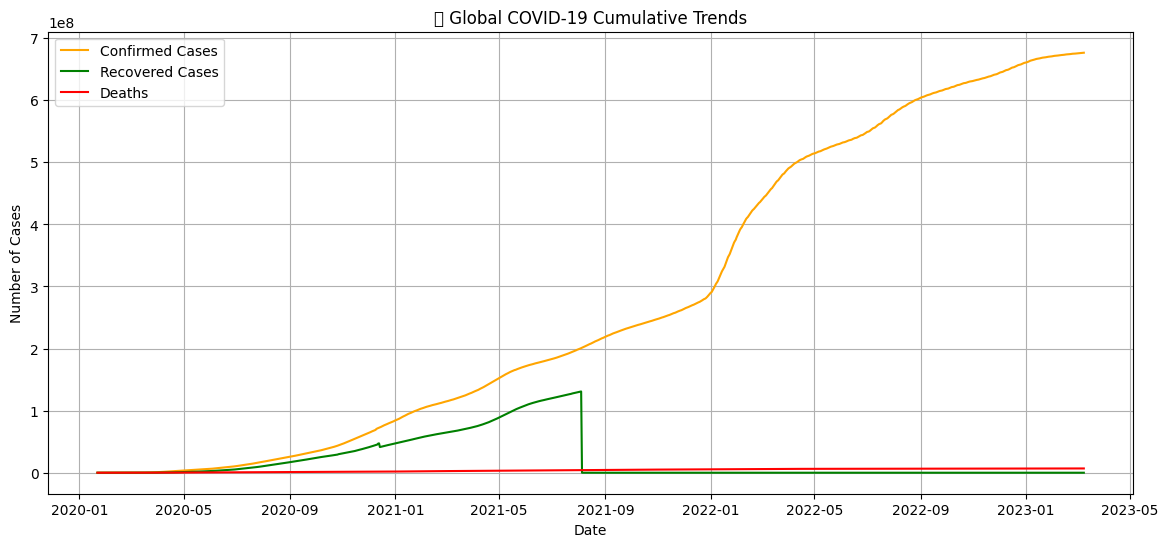

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(confirmed_global, label='Confirmed Cases', color='orange')
plt.plot(recovered_global, label='Recovered Cases', color='green')
plt.plot(deaths_global, label='Deaths', color='red')
plt.title('🌍 Global COVID-19 Cumulative Trends')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid()
plt.show()

In [24]:
# 5️⃣ Comparison of selected countries
countries = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom']

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


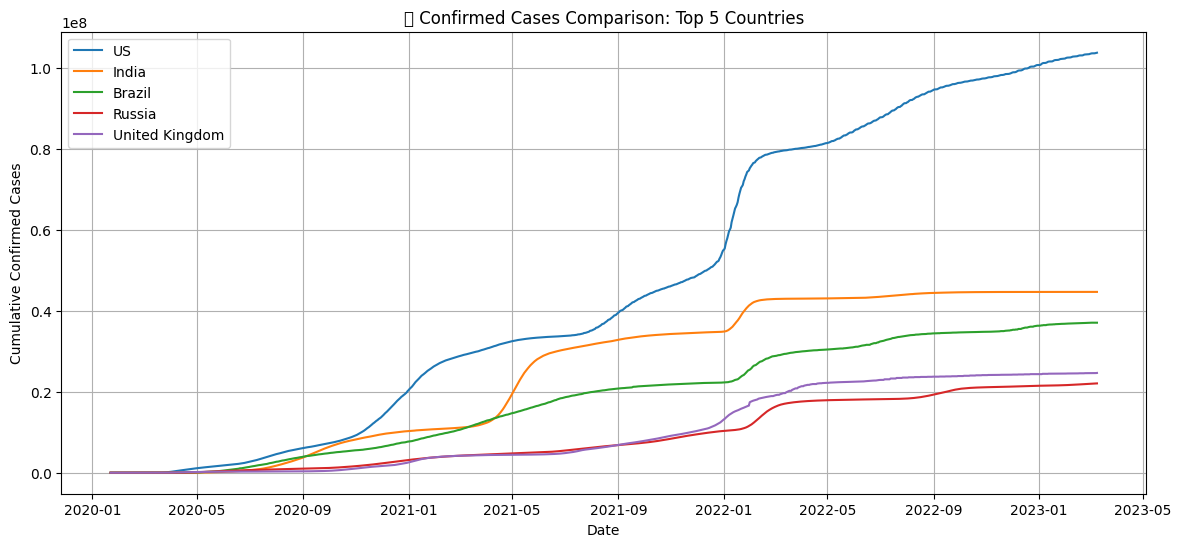

In [25]:
plt.figure(figsize=(14, 6))
for country in countries:
    plt.plot(confirmed_T[country], label=country)
plt.title('📈 Confirmed Cases Comparison: Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('Cumulative Confirmed Cases')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


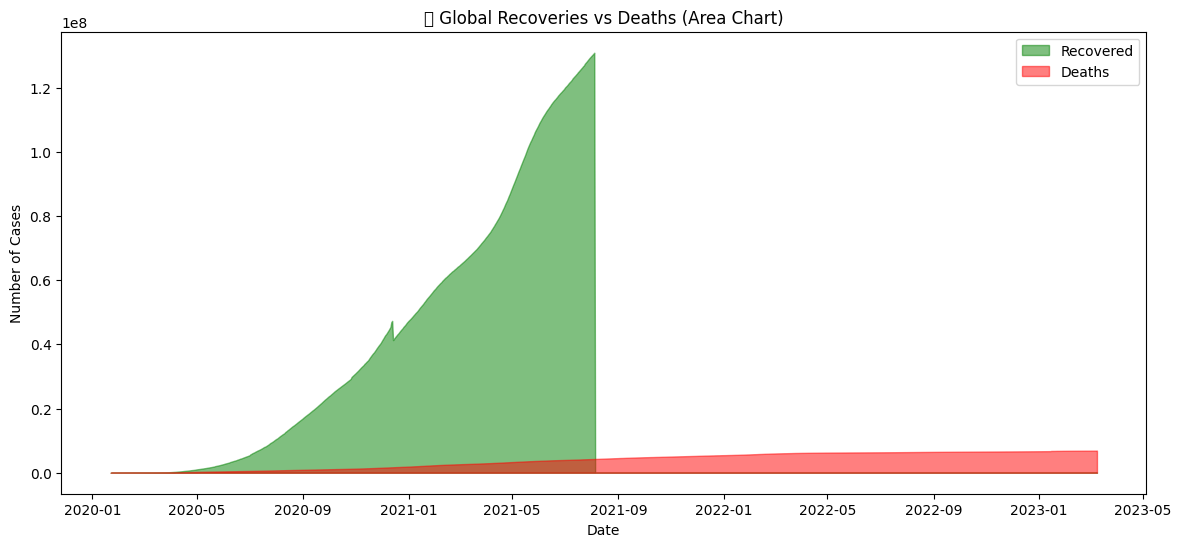

In [26]:
# 6️⃣ Area chart for recoveries vs deaths globally
plt.figure(figsize=(14, 6))
plt.fill_between(confirmed_global.index, recovered_global, color='green', alpha=0.5, label='Recovered')
plt.fill_between(confirmed_global.index, deaths_global, color='red', alpha=0.5, label='Deaths')
plt.title('🩺 Global Recoveries vs Deaths (Area Chart)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


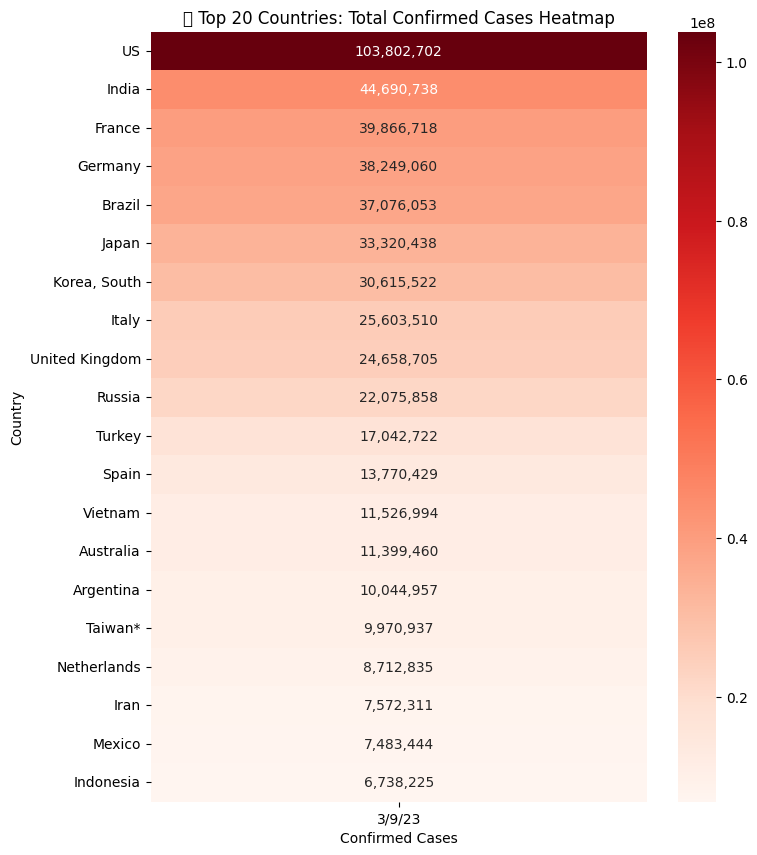

In [28]:
# 7️⃣ Heatmap of total confirmed cases by country
latest_confirmed = confirmed_clean.iloc[:, -1].sort_values(ascending=False).head(20)  # Top 20 countries

plt.figure(figsize=(8, 10))
sns.heatmap(latest_confirmed.to_frame(), annot=True, fmt=",", cmap="Reds")
plt.title('🔥 Top 20 Countries: Total Confirmed Cases Heatmap')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()


